## Pytesseract

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,321 kB/s)
debconf: unable to initi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import cv2
import re
from tabulate import tabulate
from google.colab.patches import cv2_imshow
from sklearn.cluster import AgglomerativeClustering

print(f"OpenCV version: {cv2.__version__}")

OpenCV version: 4.6.0


In [2]:
test_img = 'Rentals.ca_-_Rent_Report_-_January_2019.width-720-483x1024.png'
test_img_high_res = "Rent_Report_-_June_2019.width-720.png"

In [3]:
def preprocess(image,
               resize = False,
               preserve_ar = False,
               grayscale = False,
               gaussian_blur = False,
               thresholding = False,
               thresh_value = 127,
               verbose = True):
  '''
  Preprocess image object input with:
  image: image input file path;
  resize: Resize to desired width and height dimensions. Takes arguments tuple
    (width, height), single Integer as target width or false boolean. Will
    inforce aspect ratio based on passed target width if preserve_ar argument is
    set to True. Default = False. Default = True if resize argument is integer;
  preserve_ar: Boolean argument to preserve original image's Aspect Ratio or
    redefine based on 'resize' input. Default = True;
  grayscale: OpenCV grayscaling. Takes argument boolean = True or False.
    Default = False;
  gaussian_blur: Smooth image input with a gaussian blurring method. Takes
    arguments Integer kernel size or false boolean. Default = False;
  thresholding: OpenCV simple thresholding. Takes arguments [binary, binary_inv]
    or false boolean. Default = False;
  thresh_value: OpenCV threshold value. Takes argument Int. Default = 127;
  '''
  # Image load and input dimensions
  input_file = image
  image = cv2.imread(image)
  input_height = int(image.shape[0])
  input_width = int(image.shape[1])
  aspect_ratio = input_height/input_width
  
  if verbose:
    print(f"Processing input file: {input_file}...")

  # Resizing
  if type(resize) == int:
    resize = (resize,)
    preserve_ar = True

  if resize:
    if preserve_ar:
      image = cv2.resize(image, (resize[0], int(resize[0]*aspect_ratio)))
    else:
      image = cv2.resize(image, resize)
  
  output_height = int(image.shape[0])
  output_width = int(image.shape[1])

  # Gray-scaling
  if grayscale:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Blurring
  if gaussian_blur:
    image = cv2.GaussianBlur(image, (5, 5), gaussian_blur)

  # Thresholding
  if thresholding:
    if thresholding == "binary":
      image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY_INV)[1]
    elif thresholding == "binary_inv":
      image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY_INV)[1]
    else:
      print("Invalid thresholding argument!")
  
  if verbose:
    print(f"Image input dimensions: {(input_width, input_height)}\n"\
          f"Image output dimensions: {(output_width, output_height)}\n")
  return image

Processing input file: Rentals.ca_-_Rent_Report_-_January_2019.width-720-483x1024.png...
Image input dimensions: (483, 1024)
Image output dimensions: (1000, 2120)



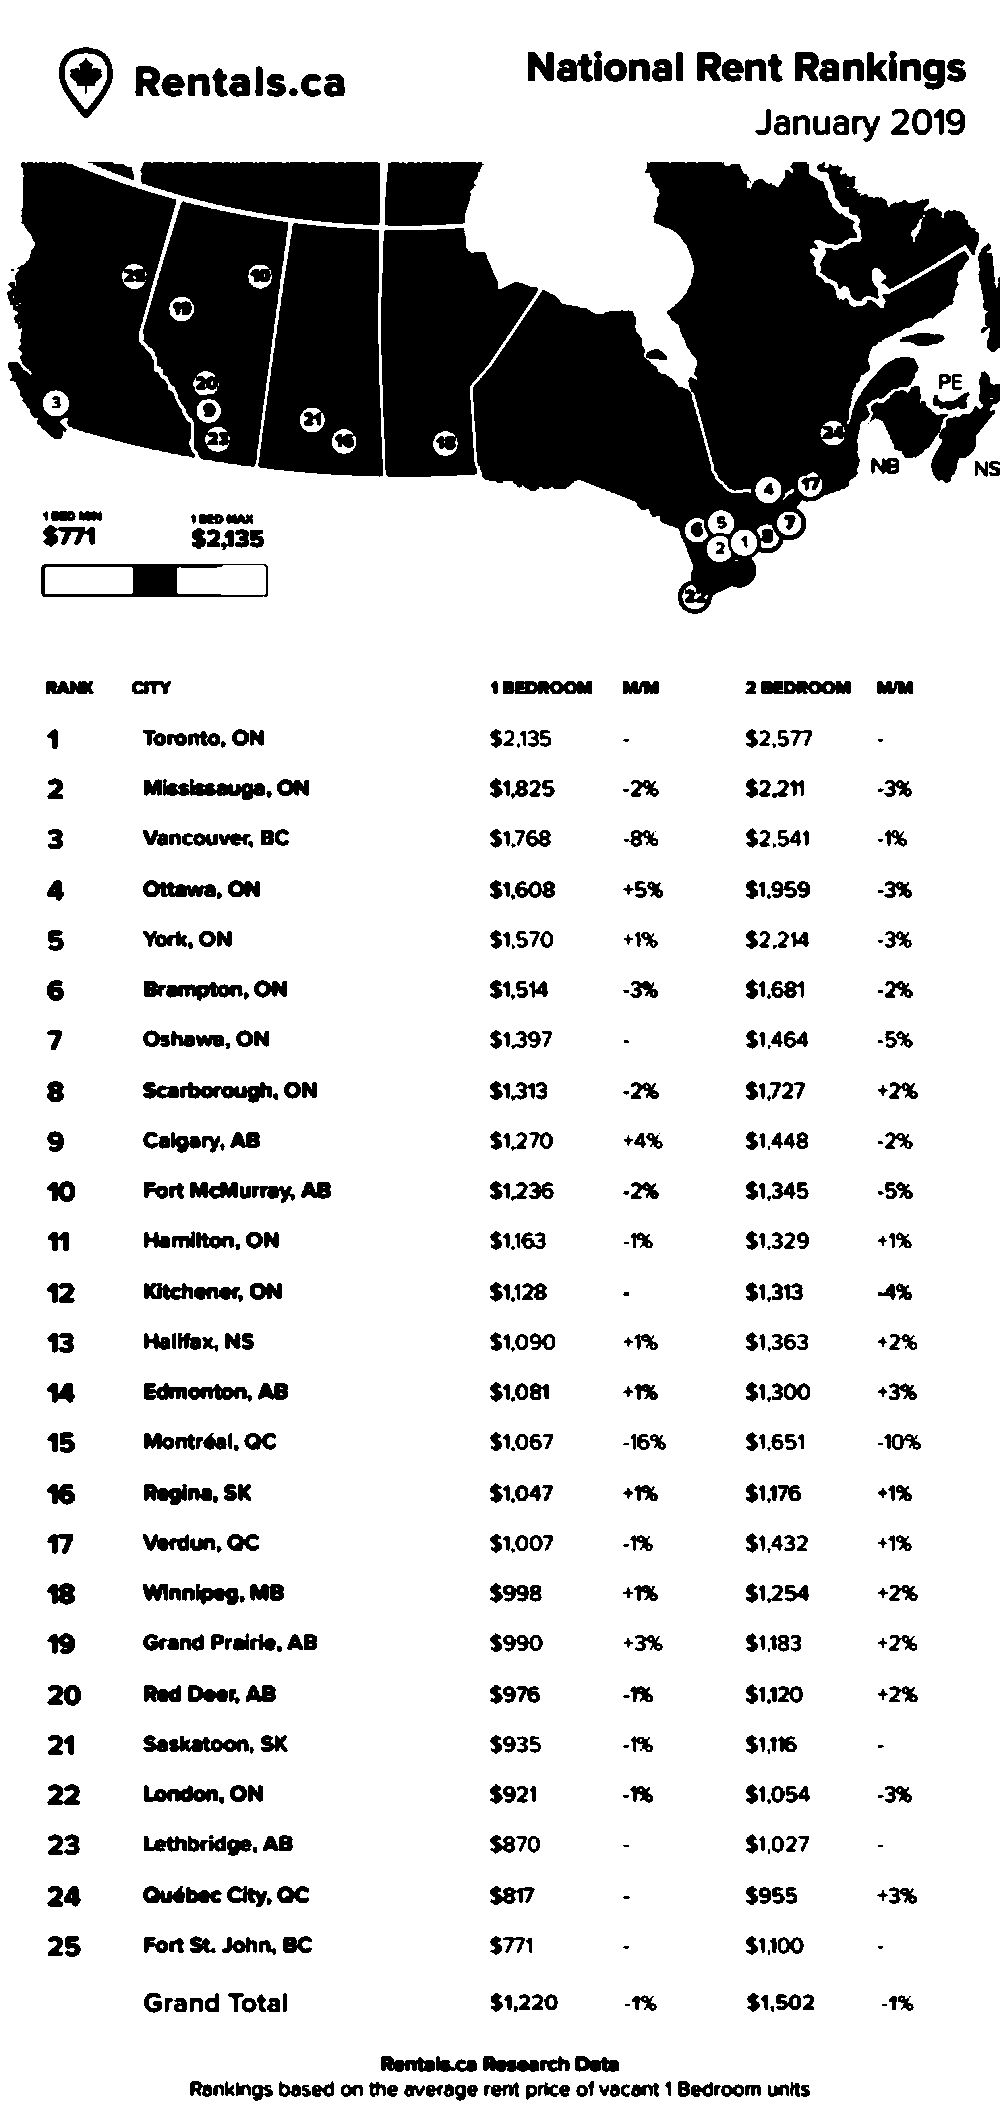

In [4]:
preprocessed_test_img = (preprocess(test_img,
                          resize = 1000,
                          grayscale = True,
                          gaussian_blur = 0,
                          thresholding = "binary",
                          thresh_value = 160))
cv2_imshow(preprocessed_test_img)

In [5]:
print(pytesseract.image_to_string(preprocessed_test_img, lang = 'eng'))

® Rentals.ca National Rent Rankings

ci

January 2019

   

1000 sane
$7™ $2135
a

RANK cry 1BEDROOM MM 2BEDROOM MM
1 Toronto, ON $2,135 - $2,577

2 Missiasauge, ON $1,825 -2% $2.21 “3%
3 Vancouver, BC $1,768 8% $2,541 “1%
4 Ottawa, ON $1,608 +5% $1,959 -3%
5 York, ON $1,570 +1% $2,214 “3%
6 Brampton, ON $1,514 3% $1.681 “2%
7 Oshawa, ON $1397 - $1,464 -5%
8 Scarborough, ON $1313 -2% $1727 +2%
9 Calgary, AB $1,270 +4% $1448 -%
70 Fort McMurray, AB $1236 +2% $1,345 5%
n Hamilton, ON $1163 -% $1,329 +1%
12 Kitchener, ON $1128 : $1,313 4%
23 Halifax, NS $1,090 +1% $1,363 +2%
" Edmonton, AB $1,081 41% $1,300 +3%
15 Montréal, OC $1.067 16% $1,651 10%
6 Regina, SK $1.047 4% $1176 +1%
7 Verdun, GC $1,007 1% $1,432 +1%
eB Winnipeg, MB $998 41% $1,254 +2%
99 Grand Prairte, AB $990 +3% $1183 +2%
20 Red Deer, AB $976 -t% $1120 +2%
21 Saskatoon, SK $935 -% $1.16 -
22 London, ON $921 -% $1,054 -3%
23 Lethbridge, AB $870 - $1,027

24 Québec City, OC $37 - $955 +3%
25 Fort St. John, BC $771 : $1100



Processing input file: Rent_Report_-_June_2019.width-720.png...
Image input dimensions: (720, 1862)
Image output dimensions: (1100, 2844)



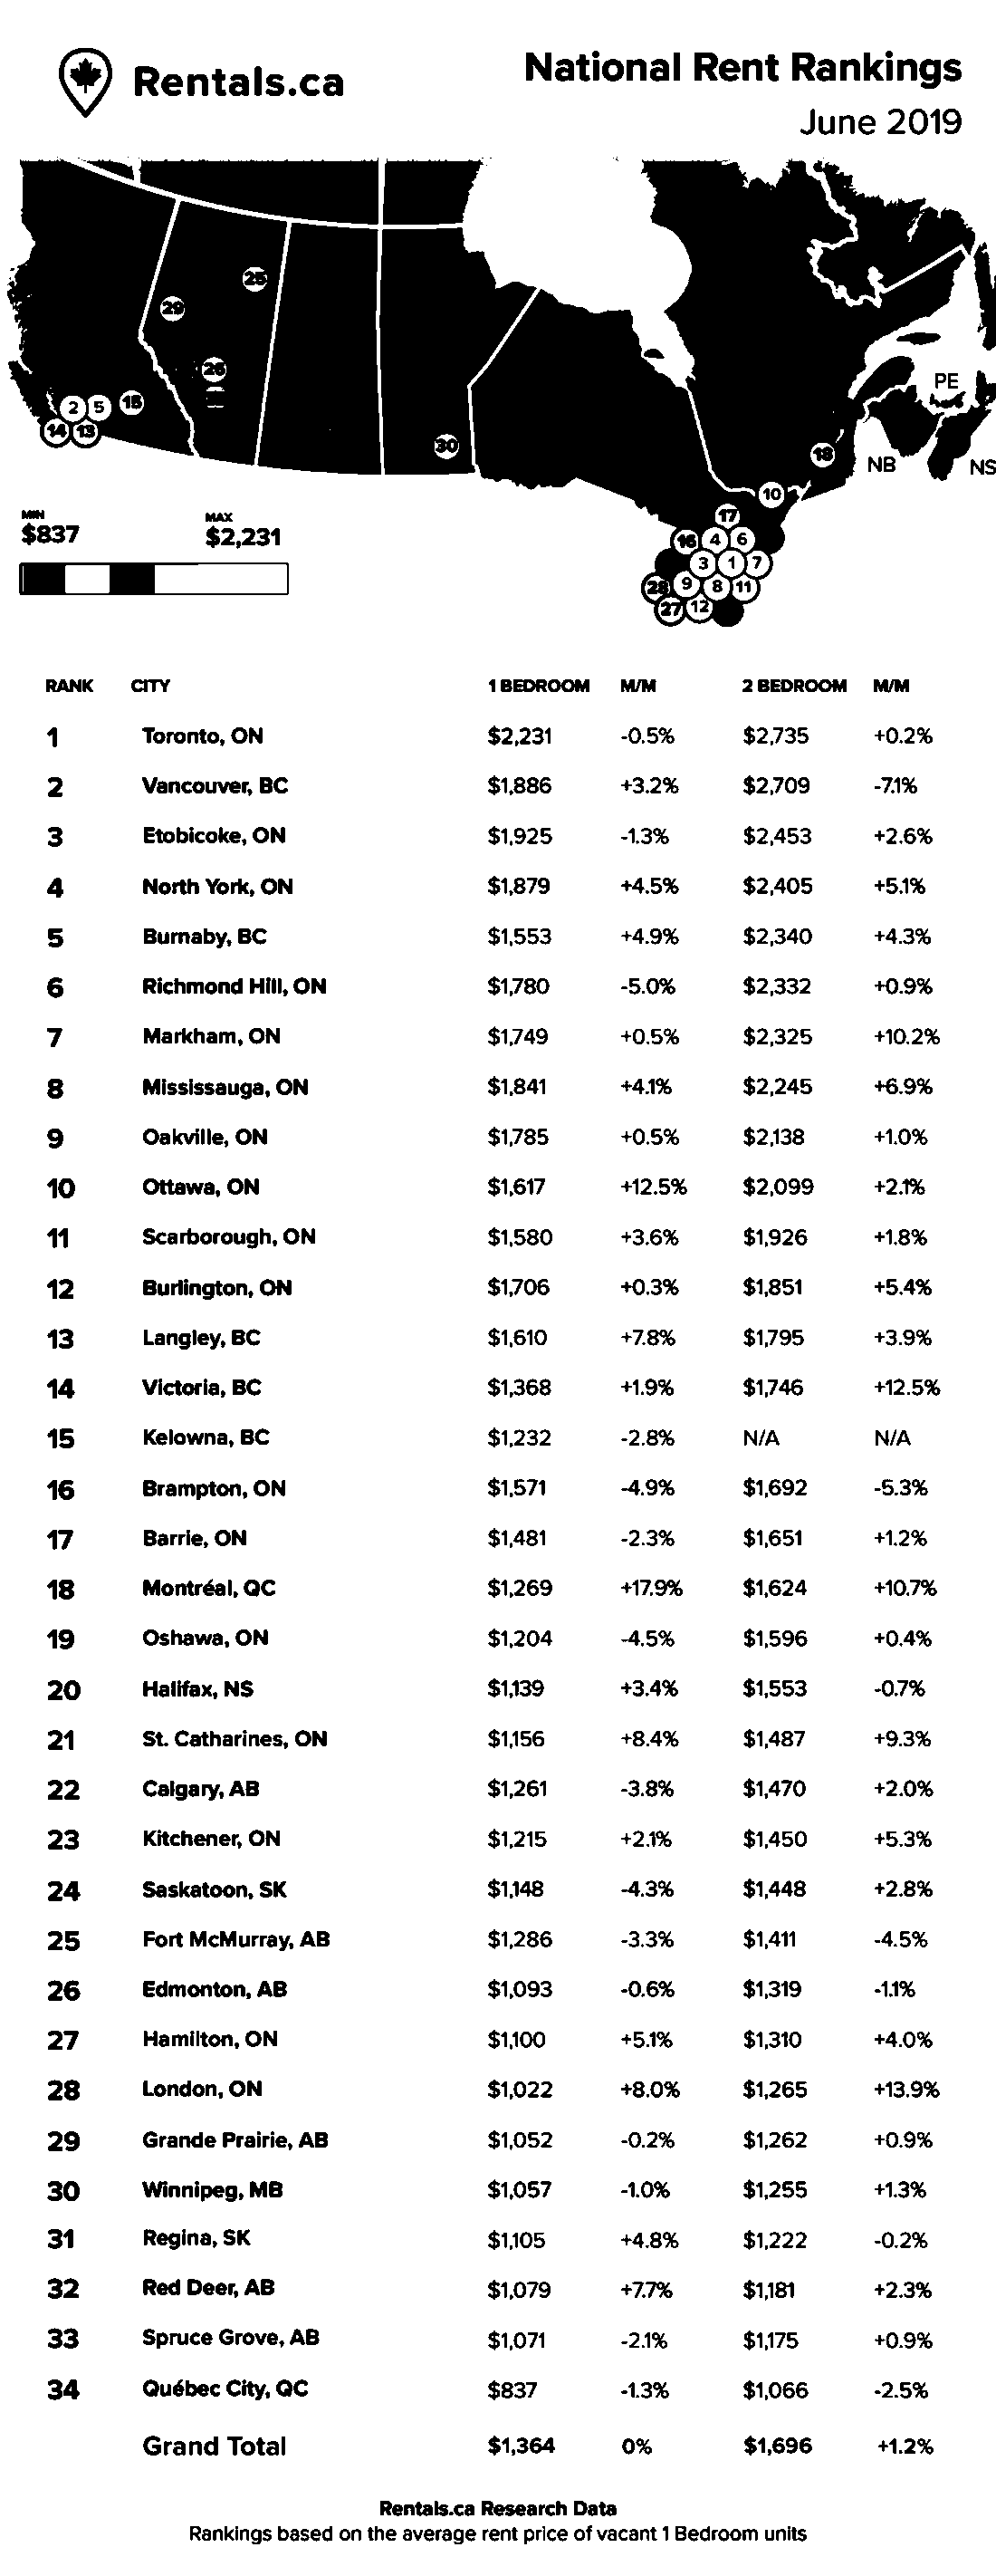

In [6]:
preprocessed_test_img_high_res = (preprocess(test_img_high_res,
                                  resize = 1100,
                                  grayscale = True,
                                  gaussian_blur = 0,
                                  thresholding = "binary",
                                  thresh_value = 160))
cv2_imshow(preprocessed_test_img_high_res)

In [7]:
print(pytesseract.image_to_string(preprocessed_test_img_high_res, lang = 'eng'))

® Rentals.ca National Rent Rankings
June 2019

 

 

RANK CITY 1BEDROOM M/M 2BEDROOM M/M
1 Toronto, ON $2,231 -0,5% $2,735 40.2%
2 Vancouver, BC $1,886 4+3.2% $2,709 -71%
3 Etobicoke, ON $1,925 ~1.3% $2,453 42.6%
4 North York, ON $1,879 44.5% $2,405 45.1%
5 Burnaby, BC $1,553 +4,.9% $2,340 44.3%
6 Richmond Hill, ON $1,780 -5.0% $2,332 40.9%
7 Markham, ON $1,749 +0.5% $2,325 +10.2%
8 Mississauga, ON $1,841 44.1% $2,245 46.9%
9 Oakville, ON $1,785 +0.5% $2138 41.0%
10 Ottawa, ON $1,617 +H12.5% $2,099 42.1%
"1 Scarborough, ON $1,580 +3.6% $1,926 41.8%
12 Burlington, ON $1,706 40.3% $1,851 45.4%
13 Langley, BC $1,610 +78% $1,795 43.9%
14 Victoria, BC $1,368 41.9% $1,746 +12.5%
45 Kelowna, BC $1,232 -2.8% N/A N/A
16 Brampton, ON $1,571 4.9% $1,692 6.3%
7 Barrie, ON $1,481 -2.3% $1,651 41.2%
18 Montréal, @C $1,269 +17,9% $1,624 0.7%
19 Oshawa, ON $1,204 45% $1,596 +0,4%
20 Halifax, NS $1,139 43.4% $1,553 0.7%
21 St. Catharines, ON $1,156 +8.4% $1,487 +9,3%
22 Calgary, AB $1,261 -3.8% $1,470 

In [8]:
# Getting OCR meta data with bounding boxes and confidences
results_test_img = pytesseract.image_to_data(preprocessed_test_img,
                                             lang = 'eng',
                                             output_type = pytesseract.Output.DICT)

In [215]:
# Getting OCR meta data with bounding boxes and confidences
results_test_img_high_res = pytesseract.image_to_data(preprocessed_test_img_high_res,
                                             lang = 'eng',
                                             output_type = pytesseract.Output.DICT)

In [255]:
def get_table(image,
              new_line_thresh = 20,
              conf_thresh = 0,
              clust_dist_thresh = 25,
              min_cluster_size = 5,
              max_cluster_size = 50,
              return_conf = False):
  '''
  Extract table content from input preprocessed image.
  image: Preprocessed image to extract table content;
  new_line_thresh: Threshold to define when to consider a new line input.
    Defined as the minimum vertical distance between lines in pixels.
    Default = 20;
  conf_thresh: Threshold to erase low confidence OCR text. Integer between 0 and
    100. Default = 0;
  clust_dist_thresh: Agglomerative clustering distance thresold. Positive
    integer. Default = 25;
  min_cluster_size: Minimum Agglomerative cluster size. Positive integer.
    Default = 5;
  max_cluster_size: Maximum Agglomerative cluster size. Positive integer.
    Default = 50;
  return_conf: Whether to return confidence level with text content. Boolean.
    Default = False;
  Return df and colored image with bounding boxes.
  '''
  OCRdict = pytesseract.image_to_data(image,
                                      lang = 'eng',
                                      output_type = pytesseract.Output.DICT)

  # Initialize OCR text content and coordinates lists
  coords = []
  OCRtext = []

  # Initialize auxiliary lists and variables
  merged_text = []
  merged_width = 0
  prov_x = 0

  # Flags to manage text content
  within_table = 0
  new_line = 0
  is_city = 0
  is_province = 0

  # Iterate through
  for i in range(0, len(OCRdict["text"])):
    # Exrtract bounding box and coordinates of the text region from OCR result
    x = OCRdict["left"][i]
    y = OCRdict["top"][i]
    # Storing previous text element "top" coordinate
    try:
      y_prev = OCRdict["top"][i-1]
    except:
      pass
    w = OCRdict["width"][i]
    h = OCRdict["height"][i]

    # Extract OCR text and confidence for thresholding
    text = OCRdict["text"][i]
    try:
      next_text = OCRdict["text"][i+1]
    except:
      pass
    conf = int(float(OCRdict["conf"][i]))

    # Initializing table on header first column 'rank'
    if "RANK" in text:
      within_table = 1

    # Checking whether current text started a new line
    if (y - y_prev) > new_line_thresh:
      if within_table:
        new_line = 1

    # Checking whether current text is a city name and closing new line flag
    if new_line or is_city:
      if not re.match("[A-Z][a-z]*.", text) == None:
        is_city = 1
        # Storing provisory x coordinate for first city name component in line
        if new_line:
          prov_x += x
        new_line = 0
        # Merging current width
        merged_width += w
    
    # Checking whether current text is a province and closing new line flag
    if is_city:
      if len(text) == 2:
        is_province = 1
        is_city = 0
        new_line = 0
        # Resetting x coordinate to the first city name component found in line
        x = prov_x
        prov_x = 0
        merged_width += w

    if is_city:
      merged_text.append(text)
    
    # Overwitting current text with merged_text list to concatenate province and
    # complete city name
    if is_province:
      merged_text.append(text)
      text = ' '.join(merged_text)
      w = merged_width
      merged_width = 0
      merged_text = []
      is_province = 0

    # Ending table on 'grand total' or 'average'
    if ("grand" in text.lower()) and ("total" in next_text.lower()):
      within_table = 0

    if "average" in text.lower():
      within_table = 0

    if conf < conf_thresh:
      text = '-'

    if within_table:
      if not is_city:
        coords.append((x, y, w, h))
        if return_conf:
          OCRtext.append(text + f" conf: {conf}")
        else:
          OCRtext.append(text)
    
  # Clustering on x coordinates to find columns
  # Instancing x coordinates with y = 0 to cluster
  xCoords = [(c[0], 0) for c in coords]

  # Hierarchical agglomerative clustering to the coordinates
  clustering = AgglomerativeClustering(n_clusters = None,
                                    affinity = "manhattan",
                                    linkage = "complete",
                                    distance_threshold = clust_dist_thresh)
  
  # Fitting AgglomerativeClustering to extracted x coordinates
  clustering.fit(xCoords)

  # Sorting clusters
  sortedClusters = []

  for label in np.unique(clustering.labels_):
    # Extract indices for the coordinates of current cluster
    idxs = np.where(clustering.labels_ == label)[0]

    # Condition acceptable cluster on mininmum size
    if (len(idxs) >= min_cluster_size) and (len(idxs) <= max_cluster_size):
      avg = np.average([coords[i][0] for i in idxs])
      sortedClusters.append((label, avg))

  # Sorting clusters by their average x-coordinate
  sortedClusters.sort(key = lambda x: x[1])
  df = pd.DataFrame()

  # Redefining test image as a colored OpenCV image
  color_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

  for (label, _) in sortedClusters:
    # Extract indices for the coordinates of current cluster
    idxs = np.where(clustering.labels_ == label)[0]

    # Y coordinates from the elements in the current cluster
    # Sort them top-to-bottom
    yCoords = [coords[i][1] for i in idxs]
    sortedIdxs = idxs[np.argsort(yCoords)]

    # Generate a random color for the cluster
    color = np.random.randint(0, 255, size = (3,), dtype = "int")
    color = [int(c) for c in color]

    # Loop over the sorted indices
    for i in sortedIdxs:
      # Extract bounding box coordinates and draw bounding box for current element
      (x, y, w, h) = coords[i]
      cv2.rectangle(color_img, (x, y), (x + w, y + h), color, 2)
    
    # Extract OCR text for the current column, then populate dataframe
    cols = [OCRtext[i].strip() for i in sortedIdxs]
    currentDF = pd.DataFrame({cols[0]: cols[1:]})

    # Concatenate initialized dataframe with currentDF
    df = pd.concat([df, currentDF], axis = 1)

  return df, color_img

In [243]:
coords = []
OCRtext = []
merged_text = []
merged_width = 0
prov_x = 0

# Flags to manage text content
within_table = 0
new_line = 0
is_city = 0
is_province = 0

for i in range(0, len(results_test_img_high_res["text"])):
  # Exrtract bounding box and coordinates of the text region from OCR result
  x = results_test_img_high_res["left"][i]
  y = results_test_img_high_res["top"][i]
  # Storing previous text element "top" coordinate
  try:
    y_prev = results_test_img_high_res["top"][i-1]
  except:
    pass
  w = results_test_img_high_res["width"][i]
  h = results_test_img_high_res["height"][i]

  # Extract OCR text and confidence for thresholding
  text = results_test_img_high_res["text"][i]
  try:
    next_text = results_test_img_high_res["text"][i+1]
  except:
    pass
  conf = int(float(results_test_img_high_res["conf"][i]))

  # Initializing table on header first column 'rank'
  if "RANK" in text:
    within_table = 1

  # Checking whether current text started a new line
  if (y - y_prev) > 20:
    if within_table:
      new_line = 1

  # Checking whether current text is a city name and closing new line flag
  if new_line or is_city:
    if not re.match("[A-Z][a-z]*.", text) == None:
      is_city = 1
      # Storing provisory x coordinate for first city name component in line
      if new_line:
        prov_x += x
      new_line = 0
      # Merging current width
      merged_width += w
  
  # Checking whether current text is a province and closing new line flag
  if is_city:
    # if not re.match("[A-Z][A-Z]", text) == None:
    if len(text) == 2:
      is_province = 1
      is_city = 0
      new_line = 0
      # Resetting x coordinate to the first city name component found in line
      x = prov_x
      prov_x = 0
      merged_width += w

  if is_city:
    merged_text.append(text)
  
  # Overwitting current text with merged_text list to concatenate province and
  # complete city name
  if is_province:
    merged_text.append(text)
    text = ' '.join(merged_text)
    w = merged_width
    merged_width = 0
    merged_text = []
    is_province = 0

  # Ending table on 'grand total' or 'average'
  if ("grand" in text.lower()) and ("total" in next_text.lower()):
    within_table = 0

  if "average" in text.lower():
    within_table = 0

  if conf < 0:
    text = '-'

  if within_table:
    if not is_city:
      coords.append((x, y, w, h))
      OCRtext.append(text + f" conf: {conf}")

In [244]:
# Clustering on x coordinates to find columns

# Instancing x coordinates with y = 0 to cluster

xCoords = [(c[0], 0) for c in coords]

# Hierarchical agglomerative clustering to the coordinates
clustering = AgglomerativeClustering(n_clusters = None,
                                     affinity = "manhattan",
                                     linkage = "complete",
                                     distance_threshold = 25)

clustering.fit(xCoords)

AgglomerativeClustering(affinity='manhattan', distance_threshold=25,
                        linkage='complete', n_clusters=None)

In [245]:
np.unique(clustering.labels_)

array([0, 1, 2, 3, 4, 5])

In [246]:
sortedClusters = []

for label in np.unique(clustering.labels_):
  # Extract indices for the coordinates of current cluster
  idxs = np.where(clustering.labels_ == label)[0]

  # Condition acceptable cluster on mininmum size
  if (len(idxs) > 5) and (len(idxs) < 50):
    avg = np.average([coords[i][0] for i in idxs])
    sortedClusters.append((label, avg))

# Sorting clusters by their average x-coordinate
sortedClusters.sort(key = lambda x: x[1])
df = pd.DataFrame()

In [247]:
sortedClusters

[(0, 157.80555555555554),
 (5, 539.0285714285715),
 (4, 686.0),
 (1, 821.1142857142858),
 (3, 966.0)]

In [248]:
# Redefining test image as a colored OpenCV image
color_test_img = cv2.cvtColor(preprocessed_test_img_high_res, cv2.COLOR_GRAY2BGR)

for (label, _) in sortedClusters:
  # Extract indices for the coordinates of current cluster
  idxs = np.where(clustering.labels_ == label)[0]

  # Y coordinates from the elements in the current cluster
  # Sort them top-to-bottom
  yCoords = [coords[i][1] for i in idxs]
  sortedIdxs = idxs[np.argsort(yCoords)]

  # Generate a random color for the cluster
  color = np.random.randint(0, 255, size = (3,), dtype = "int")
  color = [int(c) for c in color]

  # Loop over the sorted indices
  for i in sortedIdxs:
    # Extract bounding box coordinates and draw bounding box for current element
    (x, y, w, h) = coords[i]
    cv2.rectangle(color_test_img, (x, y), (x + w, y + h), color, 2)
  
  # Extract OCR text for the current column, then populate dataframe
  cols = [OCRtext[i].strip() for i in sortedIdxs]
  currentDF = pd.DataFrame({cols[0]: cols[1:]})

  # Concatenate initialized dataframe with currentDF
  df = pd.concat([df, currentDF], axis = 1)

In [249]:
for i in range(len(coords)):
  print(coords[i], OCRtext[i])

(51, 750, 52, 14) RANK conf: 93
(145, 750, 43, 14) CITY conf: 65
(540, 750, 111, 14) 1BEDROOM conf: 73
(686, 750, 39, 14) M/M conf: 69
(820, 750, 115, 14) 2BEDROOM conf: 78
(965, 750, 39, 15) M/M conf: 65
(52, 801, 978, 24) - conf: -1
(52, 803, 11, 22) 1 conf: 88
(157, 803, 161, 18) Toronto, ON conf: 96
(539, 801, 69, 23) $2,231 conf: 91
(686, 803, 59, 18) -0,5% conf: 84
(821, 801, 72, 22) $2,735 conf: 93
(966, 803, 64, 18) 40.2% conf: 42
(53, 856, 960, 24) - conf: -1
(53, 858, 16, 22) 2 conf: 96
(157, 858, 184, 18) Vancouver, BC conf: 96
(539, 856, 70, 22) $1,886 conf: 96
(686, 858, 64, 18) 4+3.2% conf: 44
(821, 856, 73, 22) $2,709 conf: 96
(966, 858, 47, 18) -71% conf: 72
(53, 912, 977, 23) - conf: -1
(53, 913, 16, 22) 3 conf: 96
(159, 913, 185, 18) Etobicoke, ON conf: 96
(539, 912, 71, 22) $1,925 conf: 94
(686, 914, 53, 18) ~1.3% conf: 57
(822, 912, 74, 22) $2,453 conf: 96
(966, 914, 64, 18) 42.6% conf: 33
(52, 967, 970, 24) - conf: -1
(52, 969, 18, 22) 4 conf: 96
(158, 969, 186, 19

In [250]:
df.fillna("", inplace=True)
print(tabulate(df, headers="keys", tablefmt="psql"))

+----+-----------------------------+---------------------+------------------+---------------------+-----------------+
|    | CITY conf: 65               | 1BEDROOM conf: 73   | M/M conf: 69     | 2BEDROOM conf: 78   | M/M conf: 65    |
|----+-----------------------------+---------------------+------------------+---------------------+-----------------|
|  0 | Toronto, ON conf: 96        | $2,231 conf: 91     | -0,5% conf: 84   | $2,735 conf: 93     | 40.2% conf: 42  |
|  1 | Vancouver, BC conf: 96      | $1,886 conf: 96     | 4+3.2% conf: 44  | $2,709 conf: 96     | -71% conf: 72   |
|  2 | Etobicoke, ON conf: 96      | $1,925 conf: 94     | ~1.3% conf: 57   | $2,453 conf: 96     | 42.6% conf: 33  |
|  3 | North York, ON conf: 96     | $1,879 conf: 96     | 44.5% conf: 57   | $2,405 conf: 96     | 45.1% conf: 17  |
|  4 | Burnaby, BC conf: 96        | $1,553 conf: 96     | +4,.9% conf: 40  | $2,340 conf: 96     | 44.3% conf: 58  |
|  5 | Richmond Hill, ON conf: 96  | $1,780 conf: 96    

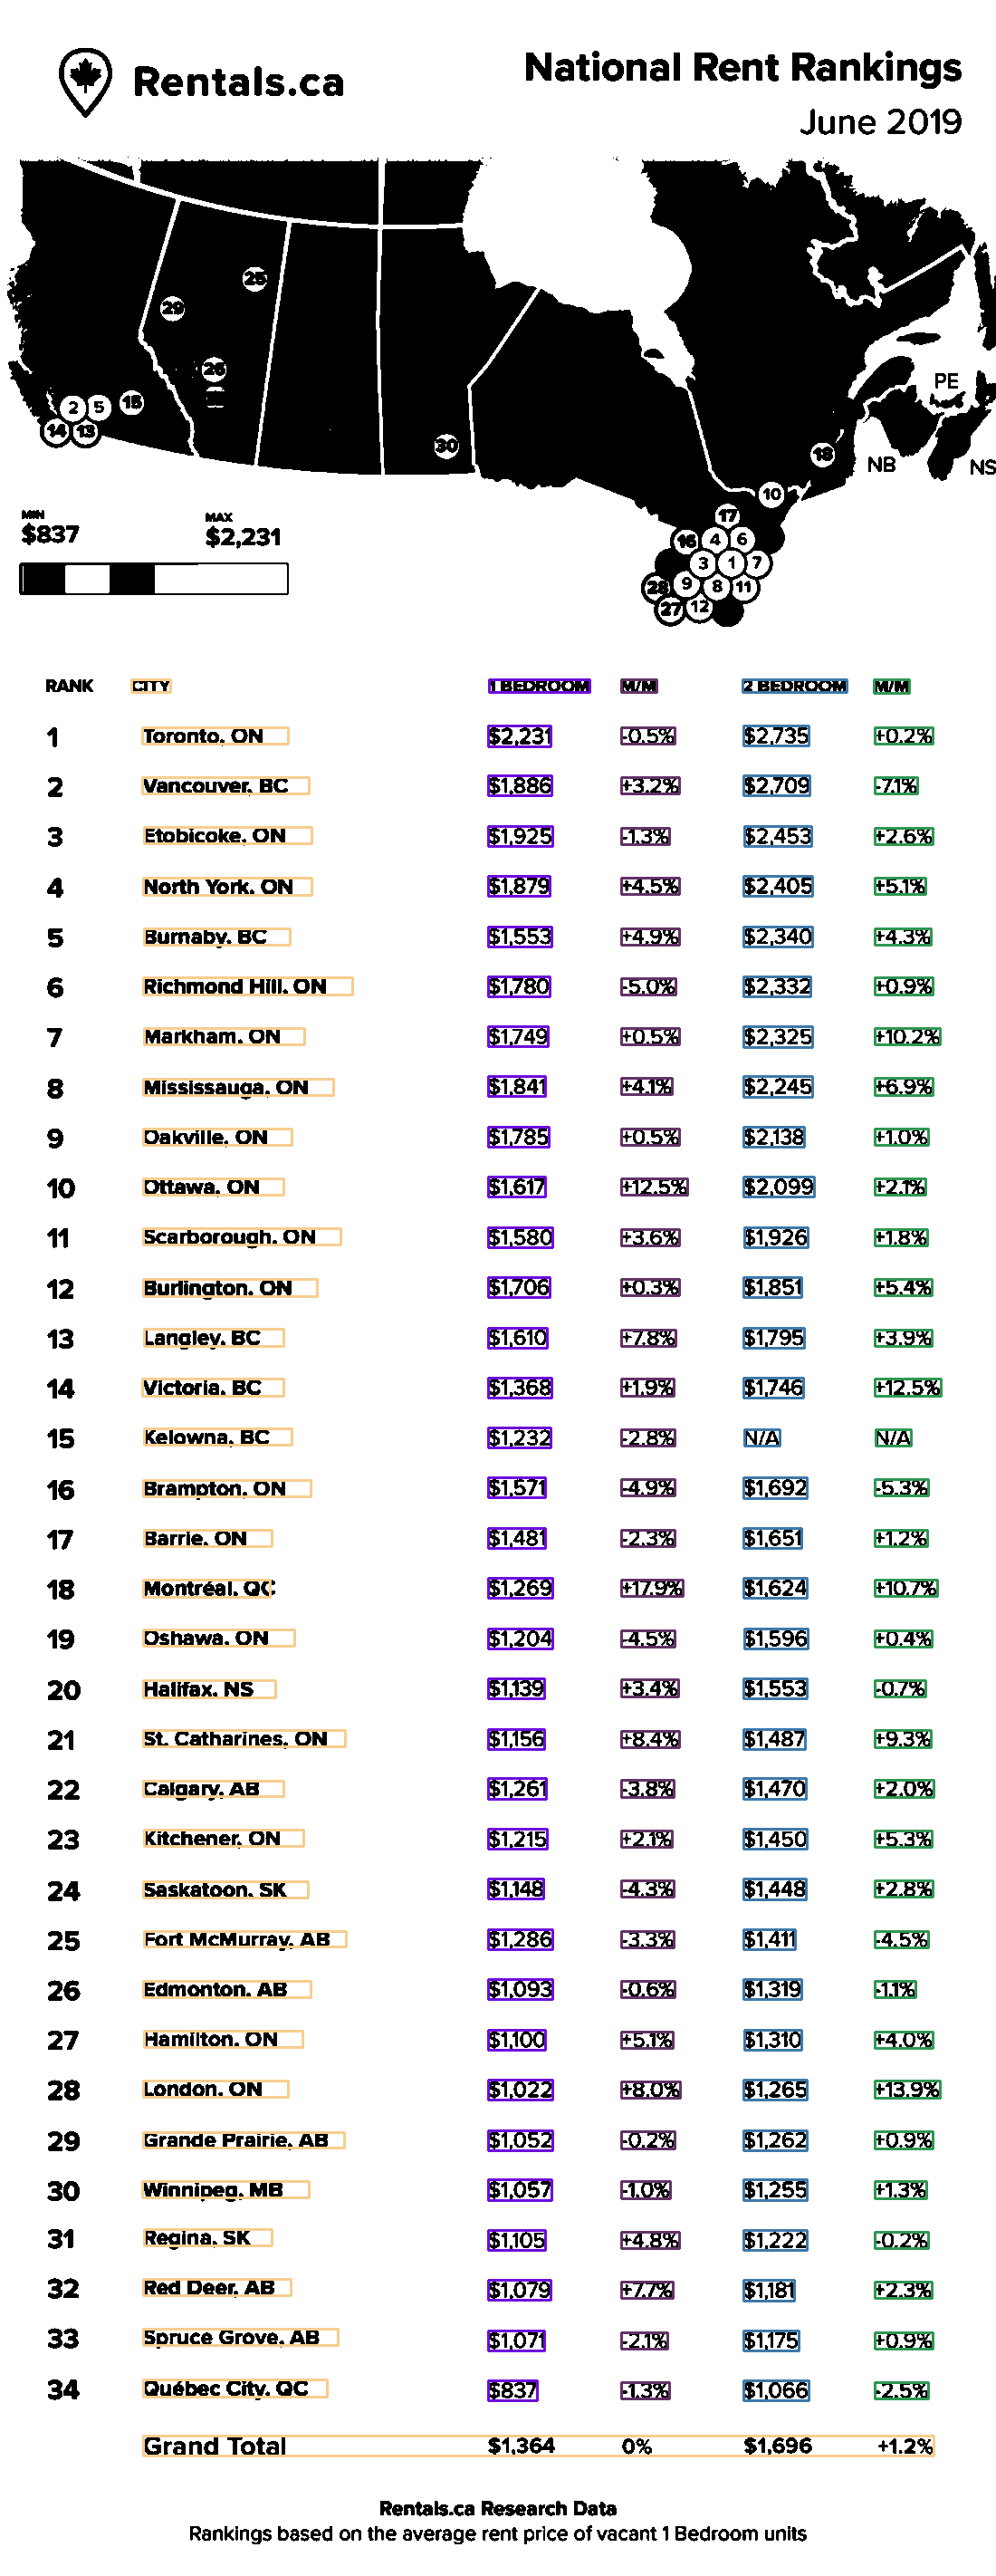

In [251]:
cv2_imshow(color_test_img)

In [280]:
df, color_img = get_table(preprocessed_test_img_high_res)
df.fillna("", inplace=True)
print(tabulate(df, headers="keys", tablefmt="psql"))

+----+--------------------+------------+---------+------------+--------+
|    | CITY               | 1BEDROOM   | M/M     | 2BEDROOM   | M/M    |
|----+--------------------+------------+---------+------------+--------|
|  0 | Toronto, ON        | $2,231     | -0,5%   | $2,735     | 40.2%  |
|  1 | Vancouver, BC      | $1,886     | 4+3.2%  | $2,709     | -71%   |
|  2 | Etobicoke, ON      | $1,925     | ~1.3%   | $2,453     | 42.6%  |
|  3 | North York, ON     | $1,879     | 44.5%   | $2,405     | 45.1%  |
|  4 | Burnaby, BC        | $1,553     | +4,.9%  | $2,340     | 44.3%  |
|  5 | Richmond Hill, ON  | $1,780     | -5.0%   | $2,332     | 40.9%  |
|  6 | Markham, ON        | $1,749     | +0.5%   | $2,325     | +10.2% |
|  7 | Mississauga, ON    | $1,841     | 44.1%   | $2,245     | 46.9%  |
|  8 | Oakville, ON       | $1,785     | +0.5%   | $2138      | 41.0%  |
|  9 | Ottawa, ON         | $1,617     | +H12.5% | $2,099     | 42.1%  |
| 10 | Scarborough, ON    | $1,580     | +3.6%   | 

In [282]:
print(tabulate(df.iloc[:-1, [0, 1, 3]].rename(columns = {'cry': 'CITY'}), headers="keys", tablefmt="psql"))

+----+--------------------+------------+------------+
|    | CITY               | 1BEDROOM   | 2BEDROOM   |
|----+--------------------+------------+------------|
|  0 | Toronto, ON        | $2,231     | $2,735     |
|  1 | Vancouver, BC      | $1,886     | $2,709     |
|  2 | Etobicoke, ON      | $1,925     | $2,453     |
|  3 | North York, ON     | $1,879     | $2,405     |
|  4 | Burnaby, BC        | $1,553     | $2,340     |
|  5 | Richmond Hill, ON  | $1,780     | $2,332     |
|  6 | Markham, ON        | $1,749     | $2,325     |
|  7 | Mississauga, ON    | $1,841     | $2,245     |
|  8 | Oakville, ON       | $1,785     | $2138      |
|  9 | Ottawa, ON         | $1,617     | $2,099     |
| 10 | Scarborough, ON    | $1,580     | $1,926     |
| 11 | Burlington, ON     | $1,706     | $1,851     |
| 12 | Langley, BC        | $1,610     | $1,795     |
| 13 | Victoria, BC       | $1,368     | $1,746     |
| 14 | Kelowna, BC        | $1,232     | N/A        |
| 15 | Brampton, ON       | 

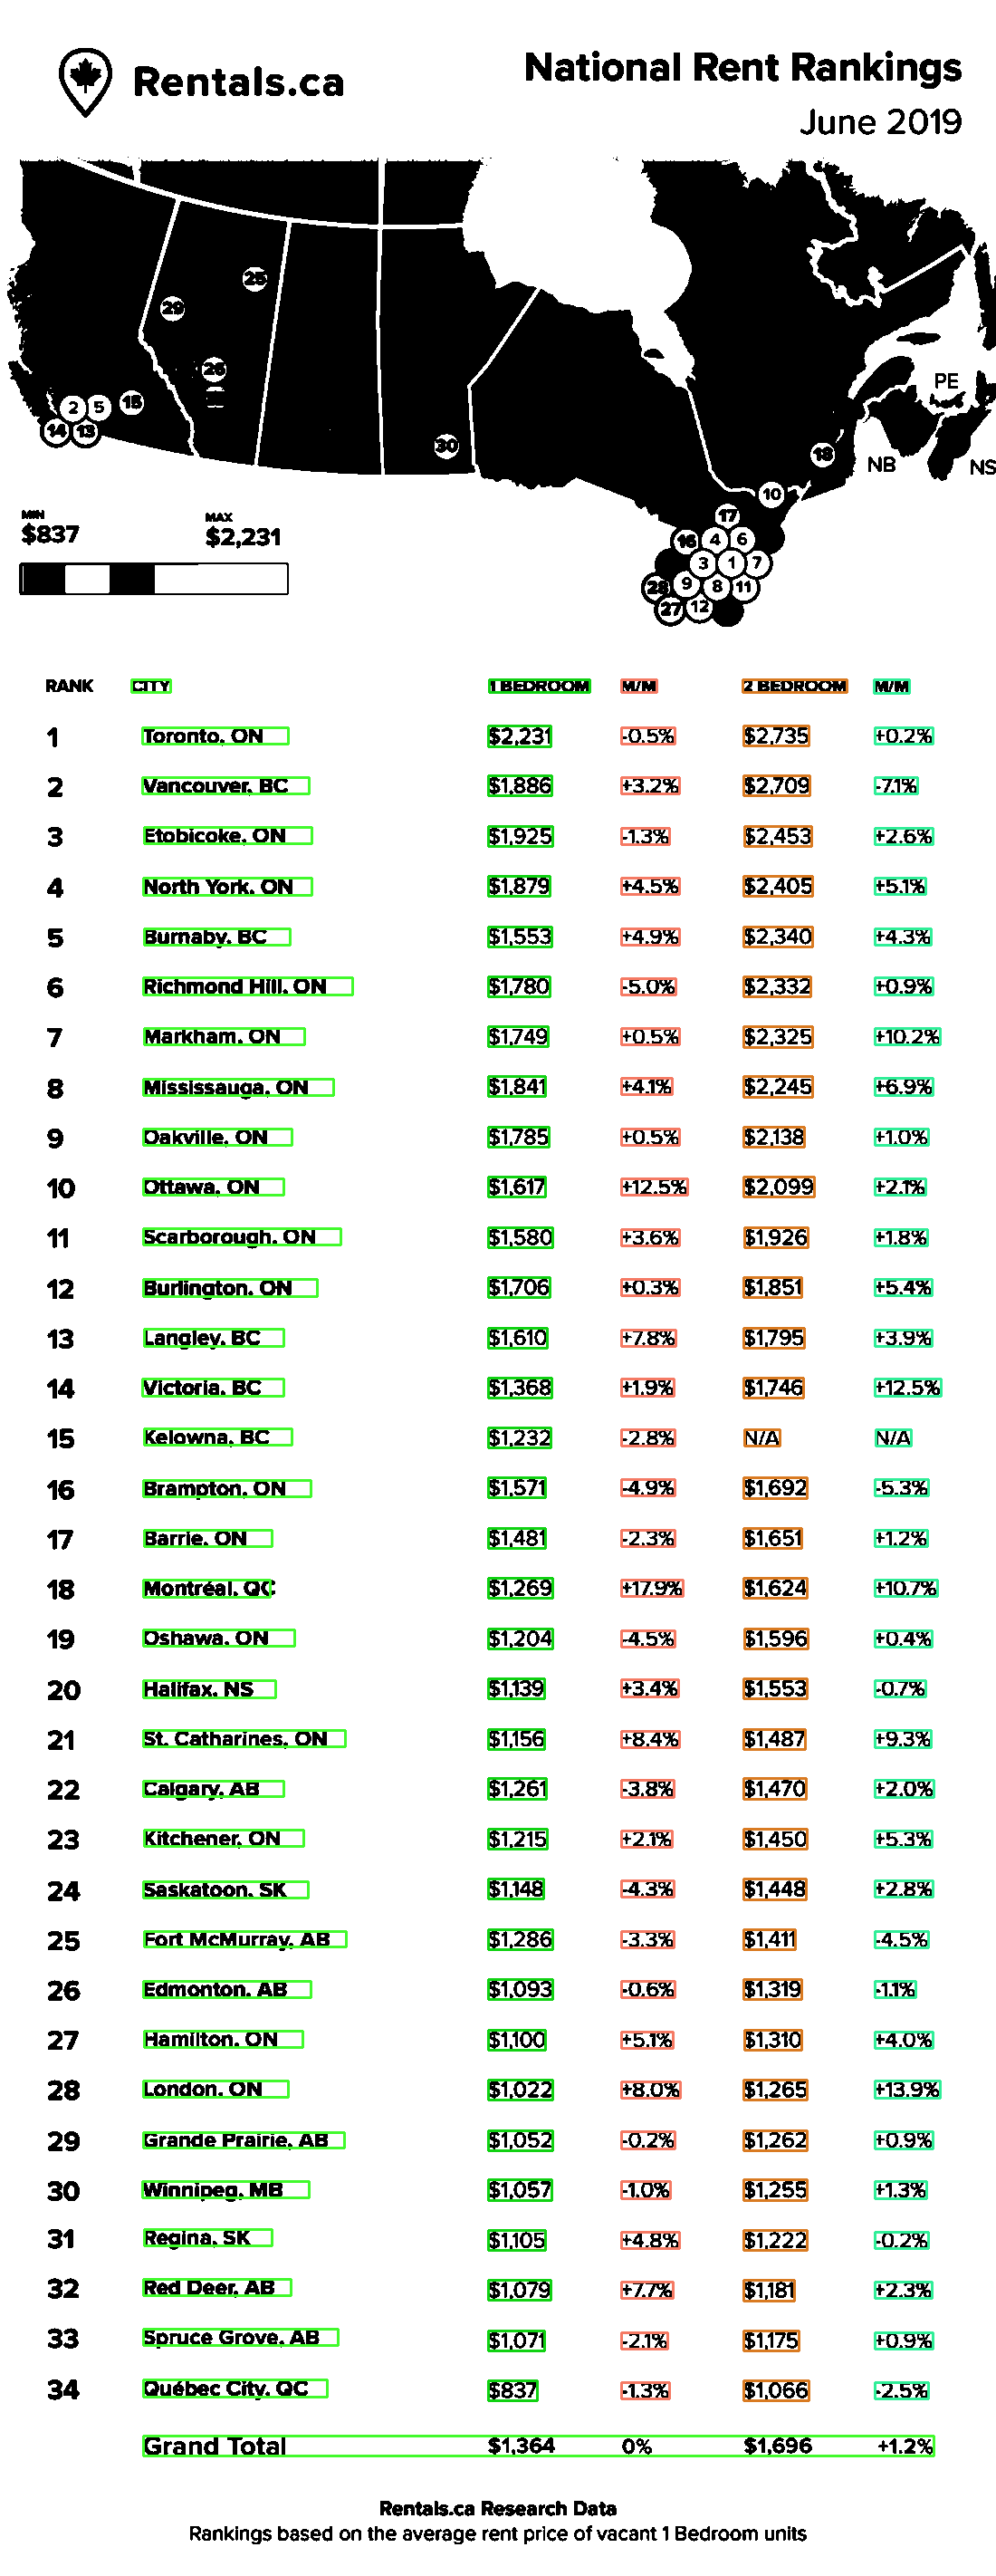

In [283]:
cv2_imshow(color_img)

In [258]:
df, color_img = get_table(preprocessed_test_img_high_res)
df.fillna("", inplace=True)
print(tabulate(df, headers="keys", tablefmt="psql"))

+----+--------------------+------------+---------+------------+--------+
|    | CITY               | 1BEDROOM   | M/M     | 2BEDROOM   | M/M    |
|----+--------------------+------------+---------+------------+--------|
|  0 | Toronto, ON        | $2,231     | -0,5%   | $2,735     | 40.2%  |
|  1 | Vancouver, BC      | $1,886     | 4+3.2%  | $2,709     | -71%   |
|  2 | Etobicoke, ON      | $1,925     | ~1.3%   | $2,453     | 42.6%  |
|  3 | North York, ON     | $1,879     | 44.5%   | $2,405     | 45.1%  |
|  4 | Burnaby, BC        | $1,553     | +4,.9%  | $2,340     | 44.3%  |
|  5 | Richmond Hill, ON  | $1,780     | -5.0%   | $2,332     | 40.9%  |
|  6 | Markham, ON        | $1,749     | +0.5%   | $2,325     | +10.2% |
|  7 | Mississauga, ON    | $1,841     | 44.1%   | $2,245     | 46.9%  |
|  8 | Oakville, ON       | $1,785     | +0.5%   | $2138      | 41.0%  |
|  9 | Ottawa, ON         | $1,617     | +H12.5% | $2,099     | 42.1%  |
| 10 | Scarborough, ON    | $1,580     | +3.6%   | 

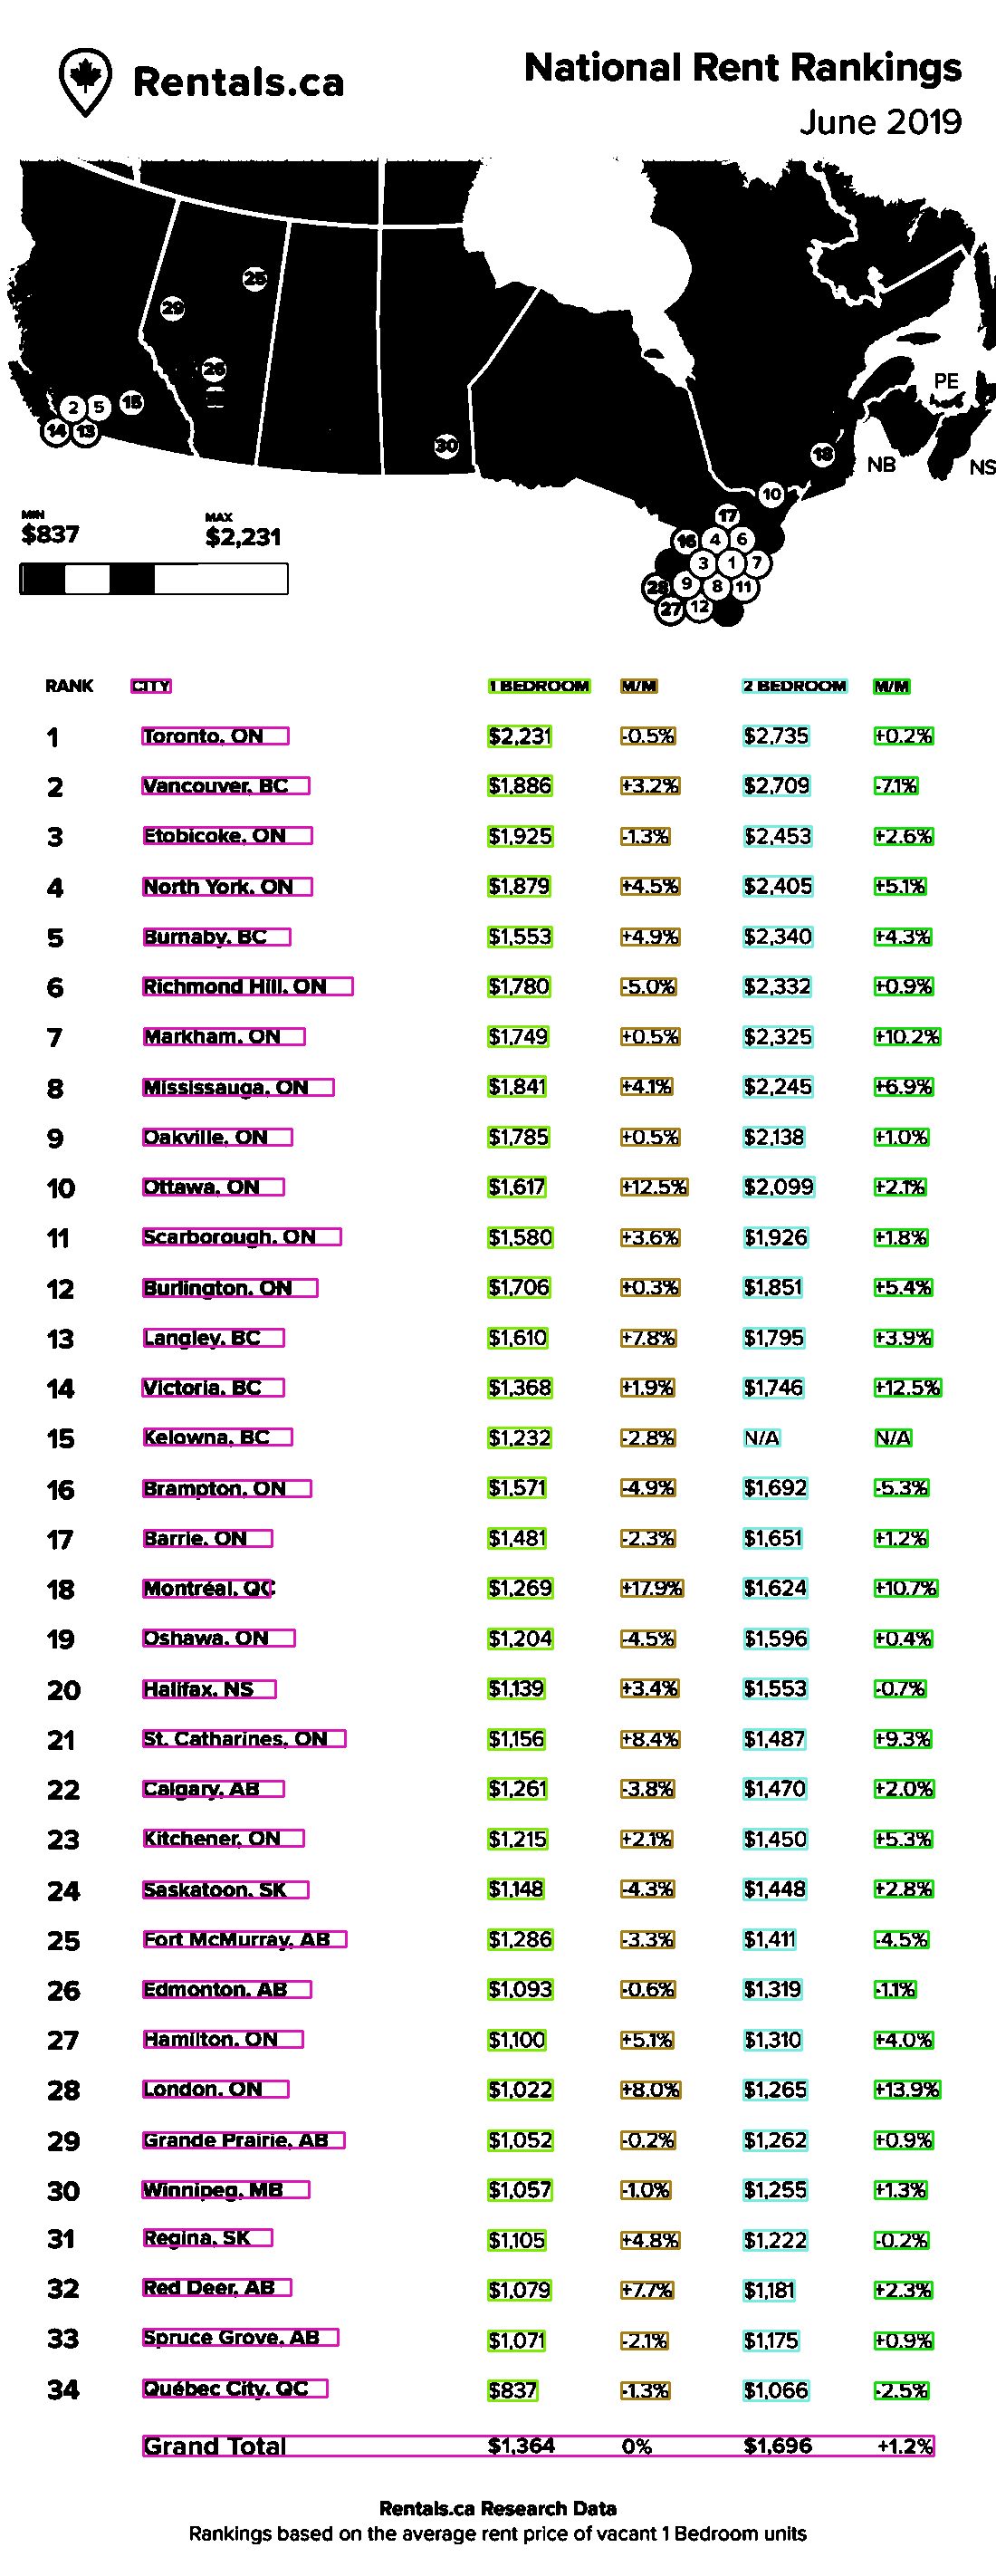

In [259]:
cv2_imshow(color_img)